# STOCK MARKET PREDICTION :

# Importing libraries

In [18]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [19]:
import warnings

# Filter out FutureWarnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Import dataset

In [20]:
# import dataset
df = pd.read_csv(r'C:\Users\hhars\Downloads\archive (1)\HistoricalQuotes.csv', index_col='Date', parse_dates=True)

# Data Cleaning

In [21]:
# Data cleaning
df = df.rename(columns={' Close/Last':'Close', ' Volume':'Volume', ' Open': 'Open', ' High':'High', ' Low':'Low'})
df['Close'] = df['Close'].str.replace('$', '').astype('float')
df['Open'] = df['Open'].str.replace('$', '').astype('float')
df['High'] = df['High'].str.replace('$', '').astype('float')
df['Low'] = df['Low'].str.replace('$', '').astype('float')

# Split training and testing datasets

In [22]:
# Split training and testing datasets
df_test = df.head(40)
df = df[40:]


# Moving average

<Axes: xlabel='Date'>

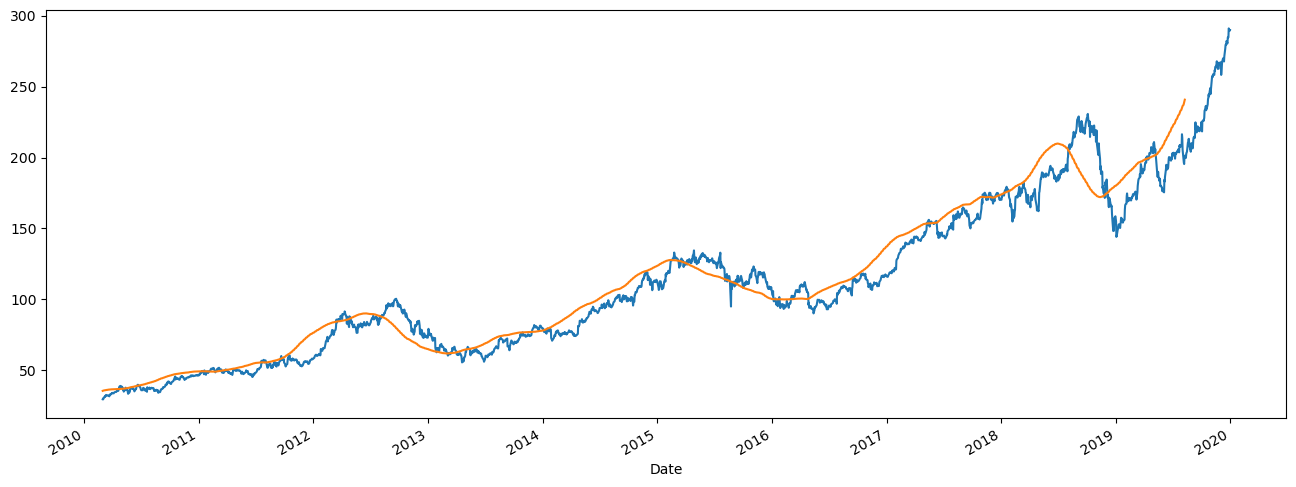

In [23]:
# Moving average
df['Open'].plot(figsize=(16, 6))
df.rolling(100).mean()['Open'].plot()

# Feature scaling

In [24]:
# Feature scaling
sc = MinMaxScaler(feature_range=(0, 1))
training_df = df['Open']
training_df = pd.DataFrame(training_df)
training_df_scaled = sc.fit_transform(training_df)

# Create structure with 60 timesteps and 1 output

In [25]:
# Create structure with 60 timesteps and 1 output
X_train = []
y_train = []

for i in range(60, len(training_df_scaled)):
    X_train.append(training_df_scaled[i-60:i, 0])
    y_train.append(training_df_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


# Initialize RNN

In [26]:
# Initialize RNN
regressor = Sequential()

# Add LSTM layers

In [27]:
# Add LSTM layers
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Output layer

In [28]:
# Output layer
regressor.add(Dense(units=1))

# Compile RNN

In [29]:
# Compile RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Fit RNN

In [30]:
# Fit RNN
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
76/76 [==============================] - 18s 105ms/step - loss: 0.0092
Epoch 2/100
76/76 [==============================] - 8s 105ms/step - loss: 0.0022
Epoch 3/100
76/76 [==============================] - 8s 109ms/step - loss: 0.0019
Epoch 4/100
76/76 [==============================] - 8s 105ms/step - loss: 0.0017
Epoch 5/100
76/76 [==============================] - 8s 105ms/step - loss: 0.0015
Epoch 6/100
76/76 [==============================] - 8s 106ms/step - loss: 0.0015
Epoch 7/100
76/76 [==============================] - 11s 138ms/step - loss: 0.0015
Epoch 8/100
76/76 [==============================] - 10s 130ms/step - loss: 0.0012
Epoch 9/100
76/76 [==============================] - 13s 173ms/step - loss: 0.0015
Epoch 10/100
76/76 [==============================] - 13s 170ms/step - loss: 0.0012
Epoch 11/100
76/76 [==============================] - 13s 167ms/step - loss: 0.0013
Epoch 12/100
76/76 [==============================] - 12s 152ms/step - loss: 0.0013
Epoch 

# Prepare test data and make predictions

In [31]:
# Prepare test data and make predictions
real_stock_price = df_test['Open'].values
df_total = pd.concat((df['Open'], df_test['Open']), axis=0)
inputs = df_total[len(df_total) - len(df_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []

for i in range(60, 100):
    X_test.append(inputs[i-60:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

C:\Users\hhars\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2/2 [==============================] - 2s 38ms/step


# Plot the results

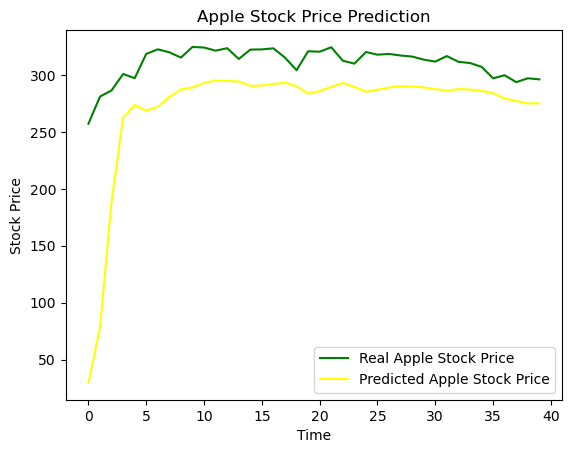

In [33]:
# Plot the results
plt.plot(real_stock_price, color='green', label='Real Apple Stock Price')
plt.plot(predicted_stock_price, color='yellow', label='Predicted Apple Stock Price')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()